## Predict Red or White

In [1]:
# Import pandas 
import pandas as pd

# Read in white wine data 
white = pd.read_csv(
    "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=';')

# Read in red wine data 
red = pd.read_csv(
    "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')

### Data Exploration

In [2]:
# Print info on white wine
print(white.info())

# Print info on red wine
print(red.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null fl

In [3]:
# First rows of `red` 
print(red.head())

# Last rows of `white`
print(white.tail())

# Take a sample of 5 rows of `red`
print(red.sample(5))

# Describe `white`
print(white.describe())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [4]:
# Double check for null values in `red`
print(pd.isnull(red))

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0             False             False        False           False      False   
1             False             False        False           False      False   
2             False             False        False           False      False   
3             False             False        False           False      False   
4             False             False        False           False      False   
5             False             False        False           False      False   
6             False             False        False           False      False   
7             False             False        False           False      False   
8             False             False        False           False      False   
9             False             False        False           False      False   
10            False             False        False           False      False   
11            False         

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2, figsize=(10,5))

ax[0].hist(red.alcohol, 10, facecolor='red', ec="black", alpha=0.5, label="Red wine")
ax[1].hist(white.alcohol, 10, facecolor='white', ec="black", lw=0.5, alpha=0.5, label="White wine")

#fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05, wspace=1)
ax[0].set_ylim([0, 1000])
ax[0].set_xlabel("Alcohol in % Vol")
ax[0].set_ylabel("Frequency")
ax[1].set_xlabel("Alcohol in % Vol")
ax[1].set_ylabel("Frequency")
#ax[0].legend(loc='best')
#ax[1].legend(loc='best')
fig.suptitle("Distribution of Alcohol in % Vol")

plt.show()

<Figure size 1000x500 with 2 Axes>

In [6]:
import numpy as np
print(np.histogram(red.alcohol, bins=[7,8,9,10,11,12,13,14,15]))
print(np.histogram(white.alcohol, bins=[7,8,9,10,11,12,13,14,15]))

(array([  0,   7, 673, 452, 305, 133,  21,   8]), array([ 7,  8,  9, 10, 11, 12, 13, 14, 15]))
(array([   0,  317, 1606, 1256,  906,  675,  131,    7]), array([ 7,  8,  9, 10, 11, 12, 13, 14, 15]))


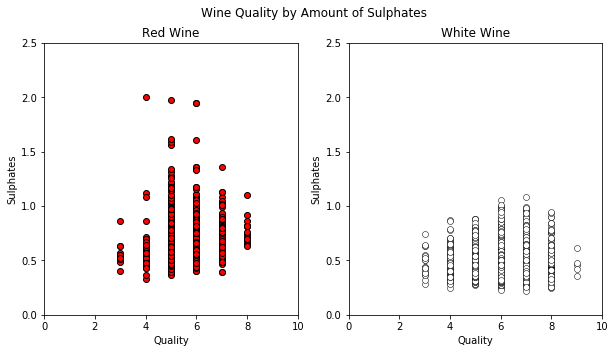

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].scatter(red['quality'], red["sulphates"], color="red",edgecolors="black")
ax[1].scatter(white['quality'], white['sulphates'], color="white", edgecolors="black", lw=0.5)

ax[0].set_title("Red Wine")
ax[1].set_title("White Wine")
ax[0].set_xlabel("Quality")
ax[1].set_xlabel("Quality")
ax[0].set_ylabel("Sulphates")
ax[1].set_ylabel("Sulphates")
ax[0].set_xlim([0,10])
ax[1].set_xlim([0,10])
ax[0].set_ylim([0,2.5])
ax[1].set_ylim([0,2.5])
#fig.subplots_adjust(wspace=0.5)
fig.suptitle("Wine Quality by Amount of Sulphates")

plt.show()

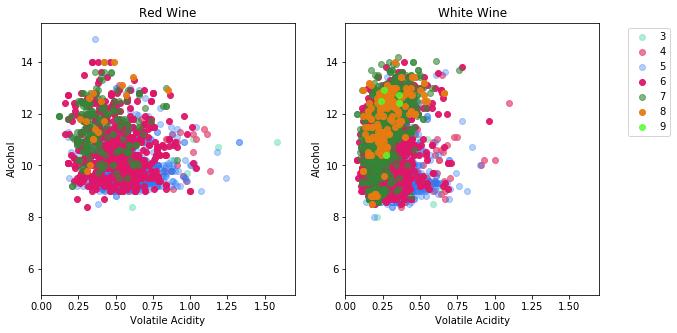

In [8]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(570)

redlabels = np.unique(red['quality'])
whitelabels = np.unique(white['quality'])

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
redcolors = np.random.rand(6,4)
whitecolors = np.append(redcolors, np.random.rand(1,4), axis=0)

for i in range(len(redcolors)):
    redy = red['alcohol'][red.quality == redlabels[i]]
    redx = red['volatile acidity'][red.quality == redlabels[i]]
    ax[0].scatter(redx, redy, c=redcolors[i])
for i in range(len(whitecolors)):
    whitey = white['alcohol'][white.quality == whitelabels[i]]
    whitex = white['volatile acidity'][white.quality == whitelabels[i]]
    ax[1].scatter(whitex, whitey, c=whitecolors[i])
    
ax[0].set_title("Red Wine")
ax[1].set_title("White Wine")
ax[0].set_xlim([0,1.7])
ax[1].set_xlim([0,1.7])
ax[0].set_ylim([5,15.5])
ax[1].set_ylim([5,15.5])
ax[0].set_xlabel("Volatile Acidity")
ax[0].set_ylabel("Alcohol")
ax[1].set_xlabel("Volatile Acidity")
ax[1].set_ylabel("Alcohol") 
#ax[0].legend(redlabels, loc='best', bbox_to_anchor=(1.3, 1))
ax[1].legend(whitelabels, loc='best', bbox_to_anchor=(1.3, 1))
#fig.suptitle("Alcohol - Volatile Acidity")
#fig.subplots_adjust(top=0.85, wspace=0.7)

plt.show()

### Preprocess Data

In [9]:
# Add `type` column to `red` with value 1
red['type'] = 1

# Add `type` column to `white` with value 0
white['type'] = 0

# Append `white` to `red`
wines = red.append(white, ignore_index=True)

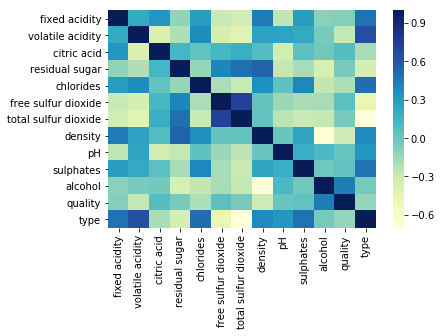

In [10]:
import seaborn as sns
corr = wines.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           cmap="YlGnBu")
plt.show()

In [11]:
# Import `train_test_split` from `sklearn.model_selection`
from sklearn.model_selection import train_test_split

# Specify the data 
X=wines.iloc[:,0:11]

# Specify the target labels and flatten the array 
y=np.ravel(wines.type)

# Split the data up in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [12]:
# Import `StandardScaler` from `sklearn.preprocessing`
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)

# Scale the test set
X_test = scaler.transform(X_test)

### Model Data

In [13]:
# Import `Sequential` from `keras.models`
from keras.models import Sequential

# Import `Dense` from `keras.layers`
from keras.layers import Dense

# Initialize the constructor
model = Sequential()

# Add an input layer 
model.add(Dense(12, activation='relu', input_shape=(11,)))

# Add one hidden layer 
model.add(Dense(8, activation='relu'))

# Add an output layer 
model.add(Dense(1, activation='sigmoid'))

Using TensorFlow backend.


In [14]:
# Model output shape
print(model.output_shape)
print()
# Model summary
print(model.summary())
print()
# Model config
print(model.get_config())
print()
# List all weight tensors 
print(model.get_weights())

(None, 1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                144       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 257
Trainable params: 257
Non-trainable params: 0
_________________________________________________________________
None

{'name': 'sequential_1', 'layers': [{'class_name': 'Dense', 'config': {'name': 'dense_1', 'trainable': True, 'batch_input_shape': (None, 11), 'dtype': 'float32', 'units': 12, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name'

### Compile and Fit

In [15]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
                   
model.fit(X_train, y_train, epochs=20, batch_size=1, verbose=1)

Epoch 1/20
4352/4352 [==============================] - 12s 3ms/step - loss: 0.0901 - acc: 0.9688
Epoch 2/20
4352/4352 [==============================] - 10s 2ms/step - loss: 0.0221 - acc: 0.9959
Epoch 3/20
4352/4352 [==============================] - 11s 3ms/step - loss: 0.0194 - acc: 0.9968
Epoch 4/20
4352/4352 [==============================] - 11s 2ms/step - loss: 0.0166 - acc: 0.9972
Epoch 5/20
4352/4352 [==============================] - 9s 2ms/step - loss: 0.0153 - acc: 0.9975
Epoch 6/20
4352/4352 [==============================] - 9s 2ms/step - loss: 0.0141 - acc: 0.9972
Epoch 7/20
4352/4352 [==============================] - 9s 2ms/step - loss: 0.0133 - acc: 0.9972
Epoch 8/20
4352/4352 [==============================] - 9s 2ms/step - loss: 0.0152 - acc: 0.9972
Epoch 9/20
4352/4352 [==============================] - 9s 2ms/step - loss: 0.0115 - acc: 0.9977
Epoch 10/20
4352/4352 [==============================] - 9s 2ms/step - loss: 0.0110 - acc: 0.9977
Epoch 11/20
4352/4352 [==

### Predict Values

In [16]:
y_pred = model.predict_classes(X_test)

In [17]:
print(y_pred[:5])
print(y_test[:5])

[[0]
 [1]
 [0]
 [0]
 [0]]
[0 1 0 0 0]


### Evaluate the Model

In [18]:
score = model.evaluate(X_test, y_test,verbose=1)

print(score)

2145/2145 [==============================] - 0s 88us/step
[0.027202624836388436, 0.9944055944055944]


In [19]:
# Import the modules from `sklearn.metrics`
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score

# Confusion matrix
confusion_matrix(y_test, y_pred)

array([[1585,    3],
       [   9,  548]])

In [20]:
# Precision 
precision_score(y_test, y_pred)

0.9945553539019963

In [21]:
# Recall
recall_score(y_test, y_pred)

0.9838420107719928

In [22]:
# F1 score
f1_score(y_test,y_pred)

0.9891696750902527

In [23]:
# Cohen's kappa
cohen_kappa_score(y_test, y_pred)

0.9853986111095354

## Predict Quality

### Preprocess data

In [24]:
# Isolate target labels
Y = wines.quality

# Isolate data
X = wines.drop('quality', axis=1)

In [25]:
# Scale the data with `StandardScaler`
X = StandardScaler().fit_transform(X)

### Model, Compile, Fit and Evaluation

In [26]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import r2_score

seed = 7
np.random.seed(seed)

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
counter = 1
mse_list,mae_list,r2_list = [],[],[]
for train, test in kfold.split(X, Y):
    # Initialize the model
    model = Sequential()
    
    # Add input layer 
    model.add(Dense(64, input_dim=12, activation='relu'))
        
    # Add output layer 
    model.add(Dense(1))
    
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    
    model.fit(X[train], Y[train], epochs=10, verbose=0)
    
    mse_value, mae_value = model.evaluate(X[test], Y[test], verbose=0)
    y_pred = model.predict(X[test])
    r2 = r2_score(Y[test], y_pred)
    
    mse_list.append(mse_value)
    mae_list.append(mae_value)
    r2_list.append(r2)

    print('The MSE value of Model %d is %f'%(counter,mse_value))
    print('The MAE value of Model %d is %f'%(counter,mae_value))
    print('The r2_score of Model %d is %f'%(counter,r2))
    print()
    counter += 1

print('The average MSE value is %f'%np.mean(mse_list))
print('The average MAE value is %f'%np.mean(mae_list))
print('The average r2_score is %f'%np.mean(r2_list))

The MSE value of Model 1 is 0.490089
The MAE value of Model 1 is 0.538095
The r2_score of Model 1 is 0.359251

The MSE value of Model 2 is 0.534342
The MAE value of Model 2 is 0.562281
The r2_score of Model 2 is 0.300120

The MSE value of Model 3 is 0.553186
The MAE value of Model 3 is 0.558414
The r2_score of Model 3 is 0.275438

The MSE value of Model 4 is 0.557667
The MAE value of Model 4 is 0.592322
The r2_score of Model 4 is 0.266682

The MSE value of Model 5 is 0.486116
The MAE value of Model 5 is 0.547870
The r2_score of Model 5 is 0.360356

The average MSE value is 0.524280
The average MAE value is 0.559796
The average r2_score is 0.312369


### Fine-Tune Parameters

In [27]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import r2_score

from keras.optimizers import SGD, RMSprop
#rmsprop = RMSprop(lr=0.01)
#sgd=SGD(lr=0.1)

seed = 7
np.random.seed(seed)

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
counter = 1
mse_list,mae_list,r2_list = [],[],[]
for train, test in kfold.split(X, Y):
    # Initialize the model
    model = Sequential()
    
    # Add input layer 
    model.add(Dense(64, input_dim=12, activation='relu'))
    
    # Add hidden layer 
    model.add(Dense(12, activation='relu'))
    
    # Add output layer 
    model.add(Dense(1))
    
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    
    model.fit(X[train], Y[train], epochs=20, verbose=0)
    
    mse_value, mae_value = model.evaluate(X[test], Y[test], verbose=0)
    y_pred = model.predict(X[test])
    r2 = r2_score(Y[test], y_pred)
    
    mse_list.append(mse_value)
    mae_list.append(mae_value)
    r2_list.append(r2)

    print('The MSE value of Model %d is %f'%(counter,mse_value))
    print('The MAE value of Model %d is %f'%(counter,mae_value))
    print('The r2_score of Model %d is %f'%(counter,r2))
    print()
    counter += 1

print('The average MSE value is %f'%np.mean(mse_list))
print('The average MAE value is %f'%np.mean(mae_list))
print('The average r2_score is %f'%np.mean(r2_list))

The MSE value of Model 1 is 0.478904
The MAE value of Model 1 is 0.537547
The r2_score of Model 1 is 0.373875

The MSE value of Model 2 is 0.498013
The MAE value of Model 2 is 0.543272
The r2_score of Model 2 is 0.347704

The MSE value of Model 3 is 0.501575
The MAE value of Model 3 is 0.545215
The r2_score of Model 3 is 0.343038

The MSE value of Model 4 is 0.508105
The MAE value of Model 4 is 0.557269
The r2_score of Model 4 is 0.331854

The MSE value of Model 5 is 0.473552
The MAE value of Model 5 is 0.540657
The r2_score of Model 5 is 0.376888

The average MSE value is 0.492030
The average MAE value is 0.544792
The average r2_score is 0.354672


In [28]:
print(y_pred[:5])
print(Y[test][:5])

[[5.175155 ]
 [5.084621 ]
 [5.4259715]
 [4.856063 ]
 [5.1939087]]
1     5
6     5
8     7
14    5
18    4
Name: quality, dtype: int64
